In [125]:
# SETUP SLEEPY
import os
os.chdir('../../')

In [126]:
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt
sl.Defaults['verbose']=False
from copy import copy

<AxesSubplot:xlabel='t / s', ylabel='<$^{15}N_z$>'>

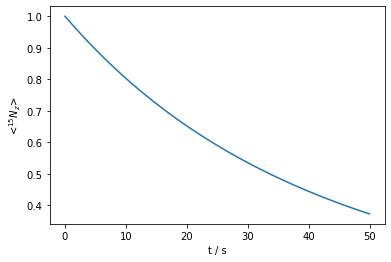

In [127]:
ex0=sl.ExpSys(600,Nucs=['1H','15N'],LF=True,pwdavg='alpha0beta45')
ex0.set_inter('dipole',i0=0,i1=1,delta=22000)
ex1=ex0.copy()
ex1.set_inter('dipole',i0=0,i1=1,delta=22000,euler_d=[0,15,0])

L=sl.Liouvillian(ex0,ex1,kex=sl.Tools.twoSite_kex(1e-10))

sl.Rho('15Nz','15Nz').DetProp(L.U(.1),n=500).plot()

In [135]:
a,b=np.linalg.eig(L[0].L(0))
bi=np.linalg.pinv(b)
i=a.real<-1e8
b[:,i]=0
bi[i]=0
Lnew=b@np.diag(a)@bi
# Lnew=0.5*(Lnew[:16][:,:16]+Lnew[16:][:,16:])

In [136]:
ex=sl.ExpSys(600,Nucs=['1H','15N'],LF=False,pwdavg='alpha0beta45')
L1=sl.Liouvillian(ex,ex).add_relax(Lnew)

<AxesSubplot:xlabel='t / s', ylabel='<$^{15}N_z$>'>

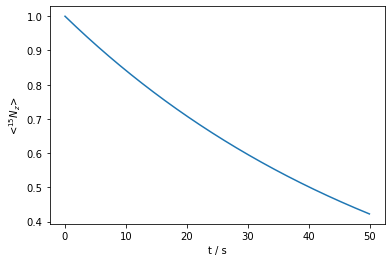

In [137]:
sl.Rho('15Nz','15Nz').DetProp(L1.U(.1),n=500).plot()

In [115]:
L1[0].L(0)

array([[-5.00000000e+09-1.18196476e-06j, -1.66566978e-06+8.63937980e+03j,
         7.35586465e-07+8.63937980e+03j, ...,
         2.41885335e-06-1.60227357e-06j,  5.25853169e-07-1.25901773e-06j,
        -2.40395113e-06-7.89063051e-07j],
       [-5.84337431e-07+8.63937980e+03j, -5.00000000e+09+7.64553706e+08j,
         1.36570956e-06+1.57964764e+04j, ...,
         3.03166360e-07-2.14488978e-06j,  1.25588301e-07+1.24290314e-06j,
        -1.28336735e-07+1.27550160e-06j],
       [-1.00865325e-07+8.63937980e+03j,  1.65978553e-06+1.57964764e+04j,
        -5.00000000e+09-7.53979078e+09j, ...,
        -3.25701790e-08-1.10016719e-07j, -3.38437849e-06+3.06942638e-07j,
        -3.12107123e-09+8.07483665e-07j],
       ...,
       [ 1.11904839e-06+3.25275146e-06j, -5.35803520e-06+2.64110258e-06j,
        -8.63591340e-07+1.19016652e-06j, ...,
        -5.00000000e+09+7.53983877e+09j,  2.27691526e-06+8.20300250e+03j,
        -3.48478079e-07-1.96998505e+04j],
       [ 1.41259800e-06+2.36244892e-06j, -1.

In [114]:
L[0].L(0)

array([[-5.e+09+0.00000000e+00j,  0.e+00+8.63937980e+03j,
         0.e+00+8.63937980e+03j, ...,  0.e+00+0.00000000e+00j,
         0.e+00+0.00000000e+00j,  0.e+00+0.00000000e+00j],
       [ 0.e+00+8.63937980e+03j, -5.e+09+3.82292650e+08j,
         0.e+00+1.57964764e+04j, ...,  0.e+00+0.00000000e+00j,
         0.e+00+0.00000000e+00j,  0.e+00+0.00000000e+00j],
       [ 0.e+00+8.63937980e+03j,  0.e+00+1.57964764e+04j,
        -5.e+09-3.76987959e+09j, ...,  0.e+00+0.00000000e+00j,
         0.e+00+0.00000000e+00j,  0.e+00+0.00000000e+00j],
       ...,
       [ 0.e+00+0.00000000e+00j,  0.e+00+0.00000000e+00j,
         0.e+00+0.00000000e+00j, ..., -5.e+09+3.76992759e+09j,
         0.e+00+8.20300250e+03j,  0.e+00-1.96998505e+04j],
       [ 0.e+00+0.00000000e+00j,  0.e+00+0.00000000e+00j,
         0.e+00+0.00000000e+00j, ...,  0.e+00+8.20300250e+03j,
        -5.e+09-3.82244651e+08j,  0.e+00-1.96998505e+04j],
       [ 0.e+00+0.00000000e+00j,  0.e+00+0.00000000e+00j,
         0.e+00+0.00000000e+00